## Twitter Sentiment Analysis - Apple vs Google

### Executive Summary (to update)

In Phase 4, the emphasis is on the Jupyter Notebook. The notebook should include a summary at the beginning that briefly and accurately describes your process. The summary should be approximately 250 words -- about the size of a research paper abstract.

Summary elements:

- Business and data understanding: what kind of data are you using, and what makes it well-suited for the business problem?
You do not need to include any data visualizations in your summary, but consider including relevant descriptive statistics
- Data preparation: why did you choose the data preparation steps that you did, and what was the result?
This should be specific to the kind of data you are working with. For example, if you are doing an NLP project, what did you decide to do with stopwords?
Be sure to list the packages/libraries used to prepare the data, and why
- Modeling: what modeling package(s) did you use, which model(s) within the package(s), and what tuning steps did you take?
For some projects there may be only one applicable package; you should still briefly explain why this was the appropriate choice
- Evaluation: how well did your final model perform?
Include one or more relevant metrics
Be sure to briefly describe your validation approach

### 1. Introduction and Overview

(to update)

### 2. Business Understanding

(to update)

### 3. Data Understanding
This section will explore the data to become familiar with its characteristics as well as identify data quality issues and gather initial insights to guide further analysis.

### Importing libraries

In [1]:
#importing the necessary libraries
# Data manipulation
import pandas as pd
import numpy as np

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# nltk
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer

# Download required NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Surpress Warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### Loading the data

In [2]:
#Loading and previewing the twitter sentiments dataset
df = pd.read_csv(r'\Users\user\Desktop\DS_Projects\phase_4_project\twitter-sentiment-analysis\data\judge-1377884607_tweet_product_company.csv', encoding='ISO-8859-1')
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


Now, I will explore the data to gain insights about the data.

In [3]:
# Previewing the top of our dataset
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [4]:
# Previewing the bottom of our dataset
df.tail()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product
9092,Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...,NaN,No emotion toward brand or product


In [5]:
# Checking the dimensions of the data
df.shape

(9093, 3)

This output shows:

 - Number of Rows (Observations): There are 9093 rows in the DataFrame.
 - Number of Columns (Variables): There are 3 columns (or variables) in the DataFrame.

In [6]:
# Checking on the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [7]:
#Checking columns
df.columns

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

From the output these are the columns in our data and their descriptions based on a review of our data and information from our data source:

 - **tweet_text:** Contains the text of each Tweet.
 - **emotion_in_tweet_is_directed_at:** Specifies the product or brand the emotion is directed at, but this column has many missing values.
 - **is_there_an_emotion_directed_at_a_brand_or_product:** Indicates the sentiment associated with the Tweet (e.g., Positive emotion, Negative emotion).

### 4. Data Preparation

Here I will clean and preprocess the data, including selecting relevant features, handling missing values, and transforming data into the desired format for modeling

#### Check for any missing values

In [8]:
# Checking for missing values
df.isnull().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

From the output we can conclude that:
 - Only **1** row is missing in the `tweet_text` column, and **5,802** rows have missing values in `emotion_in_tweet_is_directed_at`.
 - These won’t impact sentiment classification directly since we’re focusing on the `tweet_text` and `is_there_an_emotion_directed_at_a_brand_or_product` columns.

#### Check for any duplicate values

In [9]:
# Checking for duplicates
df.duplicated().sum()

22

From the output there are **22** duplicate values within this dataset.

### Data Cleaning
#### Dropping the missing values

In [10]:
# Drop rows with missing values in 'tweet_text' column
df = df.dropna(subset=['tweet_text'])

In [11]:
# Drop rows with missing values in 'emotion_in_tweet_is_directed_at' column
df = df.dropna(subset=['emotion_in_tweet_is_directed_at'])

In [12]:
# Display the cleaned dataset information to confirm the changes
df.isnull().sum()

tweet_text                                            0
emotion_in_tweet_is_directed_at                       0
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64

#### Dropping the duplicate values

In [13]:
# Checking for duplicates
df.duplicated().sum()

9

In [14]:
# Remove duplicates
df = df.drop_duplicates()

In [15]:
# Display the cleaned dataset information to confirm the changes
df.duplicated().sum()

0

### Emotion Distribution

In [16]:
emotion_counts = df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

emotion_counts.head()

Positive emotion                      2664
Negative emotion                       518
No emotion toward brand or product      91
I can't tell                             9
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

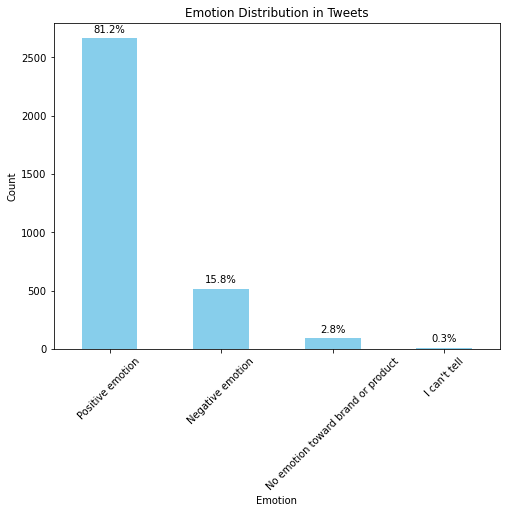

In [17]:
# Plot the bar graph with percentage labels
plt.figure(figsize=(8, 6))
ax = emotion_counts.plot(kind='bar', color='skyblue')
plt.title('Emotion Distribution in Tweets')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add percentage labels on top of each bar
for i, count in enumerate(emotion_counts):
    percentage = (count / emotion_counts.sum()) * 100
    ax.text(i, count + 50, f'{percentage:.1f}%', ha='center')

plt.show()

### Cleaning the `tweet_text` column

In [18]:
import re

# Function to clean tweet text
def clean_tweet_text(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove special characters and numbers, keep only alphabets and basic punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

# Apply the cleaning function to the tweet_text column
df['cleaned_tweet_text'] = df['tweet_text'].apply(clean_tweet_text)

# Display the first few cleaned tweet texts
df[['tweet_text', 'cleaned_tweet_text']].head()

,tweet_text,cleaned_tweet_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,i have a g iphone after hrs tweeting at rise...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,know about awesome ipadiphone app that youl...
2,@swonderlin Can not wait for #iPad 2 also. The...,can not wait for ipad also they should sale ...
3,@sxsw I hope this year's festival isn't as cra...,i hope this years festival isnt as crashy as ...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,great stuff on fri sxsw marissa mayer google ...


The `tweet_text` column has been cleaned and now includes a new column, `cleaned_tweet_text`, which contains the processed text. This text is free from *URLs, mentions, special characters,* and *numbers,* and is all *lowercase* for consistency.

In [19]:
# Previewing the top of our dataset
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,cleaned_tweet_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,i have a g iphone after hrs tweeting at rise...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,know about awesome ipadiphone app that youl...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,can not wait for ipad also they should sale ...
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,i hope this years festival isnt as crashy as ...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,great stuff on fri sxsw marissa mayer google ...


### Tokenization and stopword removal

In [20]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

# Download NLTK resources for tokenization and stopwords if not already available
nltk.download('punkt')
nltk.download('stopwords')

# Define stopwords list
stop_words = set(stopwords.words('english'))

# Tokenize and remove stopwords
def tokenize_and_remove_stopwords(text):
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply the function to cleaned tweet text
df['processed_tweet_text'] = df['cleaned_tweet_text'].apply(tokenize_and_remove_stopwords)

# Display the first few processed tweet texts
df[['cleaned_tweet_text', 'processed_tweet_text']].head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,cleaned_tweet_text,processed_tweet_text
0,i have a g iphone after hrs tweeting at rise...,g iphone hrs tweeting riseaustin dead need upg...
1,know about awesome ipadiphone app that youl...,know awesome ipadiphone app youll likely appre...
2,can not wait for ipad also they should sale ...,wait ipad also sale sxsw
3,i hope this years festival isnt as crashy as ...,hope years festival isnt crashy years iphone a...
4,great stuff on fri sxsw marissa mayer google ...,great stuff fri sxsw marissa mayer google tim ...


In [21]:
# Previewing the top of our dataset
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,cleaned_tweet_text,processed_tweet_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,i have a g iphone after hrs tweeting at rise...,g iphone hrs tweeting riseaustin dead need upg...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,know about awesome ipadiphone app that youl...,know awesome ipadiphone app youll likely appre...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,can not wait for ipad also they should sale ...,wait ipad also sale sxsw
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,i hope this years festival isnt as crashy as ...,hope years festival isnt crashy years iphone a...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,great stuff on fri sxsw marissa mayer google ...,great stuff fri sxsw marissa mayer google tim ...


The `processed_tweet_text` column now contains tokenized tweets with stopwords removed, making it ready for feature extraction and model training.

## 5. Modeling

To start the modeling phase, I'll first prepare the data for a binary classification task (positive vs. negative), as per the plan to build a simple model first. Here are the steps:

 - **Label Encoding:** Convert the sentiment labels to numerical values for binary classification.
 - **Feature Extraction:** Use TF-IDF to convert the text data into numerical features.
 - **Train-Test Split:** Split the data into training and testing sets.
 - **Modeling:** Train a baseline model (e.g., Logistic Regression) to classify tweets as positive or negative.

### 5.1 Encoding sentiment labels

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Filter the dataset for binary classification: positive and negative tweets only
binary_df = df[df['is_there_an_emotion_directed_at_a_brand_or_product'].isin(['Positive emotion', 'Negative emotion'])]

# Encode the sentiment labels as binary (0 for Negative, 1 for Positive)
label_encoder = LabelEncoder()
binary_df['sentiment'] = label_encoder.fit_transform(binary_df['is_there_an_emotion_directed_at_a_brand_or_product'])

### 5.2 Feature Extraction

In [23]:
# Extract features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limiting to top 5000 words to simplify
X = tfidf_vectorizer.fit_transform(binary_df['processed_tweet_text'])
y = binary_df['sentiment']